# - Prediction on CIFAR-10 dataset using CNN:
### - CNN: Convolutional Neural Network

<br>
<img src="../CIFAR-10/pictures/cifar_10_data_set.png"
     style="float: center; width:650px;height:500;"/>
<caption><center> <u><b> Figure 1 </u></b>: (CIFAR-10) classes <br> </center></caption><br>

- <b>There're are 10 classes in MNIST data set:</b>
- if picture (airplane) => class 0 
- if picture (automobile) => calss 1
- if picture (bird) => class 2
- if picture (cat) => class 3
- if picture (deer) => class 4
- if picture (dog) => class 5
- if picture (frog) => class 6
- if picture (horse) => class 7
- if picture (ship) => class 8
- if picture (truck) => class 9

In [1]:
# basic libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#tensorflow:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# skelearn:
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# loading dataset: (CIFAR-10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# shape of our data:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


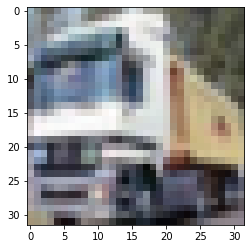

In [4]:
# image:
image_test_01 = x_train[1]
plt.imshow(image_test_01)
plt.show()

In [5]:
# normalizing / one_hot_encoding: (preprocessing)
x_train = x_train / 255
x_test = x_test / 255

# one_hot_encoding:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [6]:
print("y_train_cat shape: ", y_train_cat.shape)

y_train_cat shape:  (50000, 10)


In [7]:
# creating our model:
cnn_model = Sequential()
# Conv2D:(1)
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(4,4),
                     strides=(1,1),
                     padding="valid",
                     activation="relu",
                     input_shape=(32, 32, 3)))
# MaxPool:(2)
cnn_model.add(MaxPool2D(pool_size=(2,2)))

# Conv2D:(3)
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(4,4),
                     strides=(1,1),
                     padding="valid",
                     activation="relu",
                     input_shape=(32, 32, 3)))
# MaxPool:(4)
cnn_model.add(MaxPool2D(pool_size=(2,2)))

# flatten:
cnn_model.add(Flatten())
# Dense:
cnn_model.add(Dense(256, activation="relu"))

# output:
cnn_model.add(Dense(10, activation="softmax"))

# compiling the model:
cnn_model.compile(optimizer="adam",
                  loss="categorical_crossentropy", 
                  metrics="accuracy")

In [8]:
# summary of the model:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [9]:
# adding early stopping:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [10]:
# fitting the model:
cnn_model.fit(x_train,
              y_train_cat,
              validation_data=(x_test, y_test_cat),
              epochs=15,
              batch_size=128,
              callbacks=early_stop)

Epoch 1/15
391/391 [==============================] - 241s 609ms/step - loss: 1.6269 - accuracy: 0.4092 - val_loss: 1.3664 - val_accuracy: 0.5086
Epoch 2/15
391/391 [==============================] - 240s 614ms/step - loss: 1.2873 - accuracy: 0.5440 - val_loss: 1.2158 - val_accuracy: 0.5644
Epoch 3/15
391/391 [==============================] - 241s 616ms/step - loss: 1.1483 - accuracy: 0.5960 - val_loss: 1.1115 - val_accuracy: 0.6082
Epoch 4/15
391/391 [==============================] - 237s 606ms/step - loss: 1.0466 - accuracy: 0.6348 - val_loss: 1.0625 - val_accuracy: 0.6262
Epoch 5/15
391/391 [==============================] - 237s 606ms/step - loss: 0.9654 - accuracy: 0.6622 - val_loss: 1.0188 - val_accuracy: 0.6486
Epoch 6/15
391/391 [==============================] - 239s 612ms/step - loss: 0.8954 - accuracy: 0.6878 - val_loss: 0.9996 - val_accuracy: 0.6565
Epoch 7/15
391/391 [==============================] - 236s 605ms/step - loss: 0.8382 - accuracy: 0.7070 - val_loss: 0.9628 -

In [11]:
# saving the model:
cnn_model.save(".\saved_model\cifar_10_cnn_model.h5")

In [12]:
# plotting (loss, val_loss) ||| plotting (accuracy, val_accuracy)
metrics = pd.DataFrame(data=cnn_model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.626916,0.40916,1.366363,0.5086
1,1.287291,0.54400,1.215770,0.5644
2,1.148308,0.59602,1.111481,0.6082
3,1.046564,0.63478,1.062478,0.6262
4,0.965432,0.66220,1.018807,0.6486
5,0.895430,0.68776,0.999561,0.6565
6,0.838172,0.70700,0.962790,0.6756
7,0.781874,0.72828,0.934096,0.6773
8,0.727366,0.74764,0.925843,0.6832
9,0.679821,0.76508,0.936434,0.6832


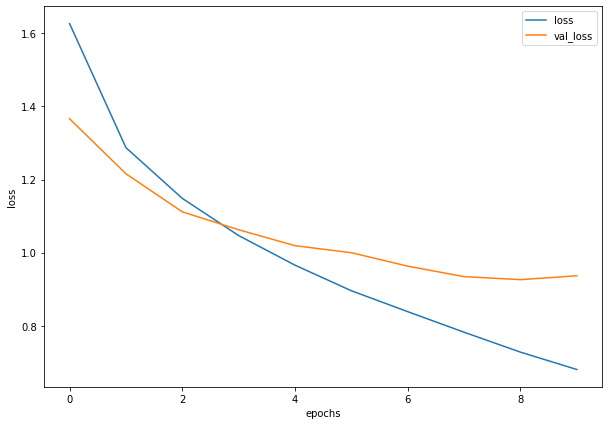

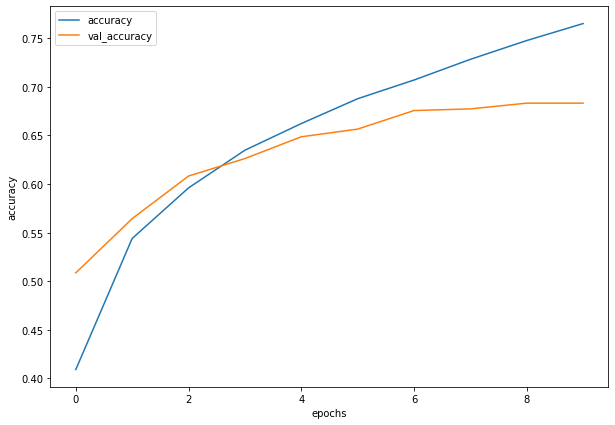

In [13]:
# plotting (loss, val_loss) ||| plotting (accuracy, val_accuracy)

# plotting loss:
metrics[["loss", "val_loss"]].plot(figsize=(10,7))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# plotting accuracy:
metrics[["accuracy", "val_accuracy"]].plot(figsize=(10,7))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [14]:
# evaluation of the model:
cnn_model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 20s 65ms/step - loss: 0.9364 - accuracy: 0.6832


[0.9364339709281921, 0.6832000017166138]

In [15]:
# evaluation of the model by classification report metric:
predictions = np.argmax(cnn_model.predict(x=x_test), axis=1)
classification_rep = classification_report(y_test, predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.89      0.70      0.78      1000
           2       0.63      0.56      0.60      1000
           3       0.44      0.59      0.50      1000
           4       0.68      0.57      0.62      1000
           5       0.58      0.56      0.57      1000
           6       0.78      0.77      0.77      1000
           7       0.71      0.76      0.73      1000
           8       0.75      0.81      0.78      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000



<AxesSubplot:>

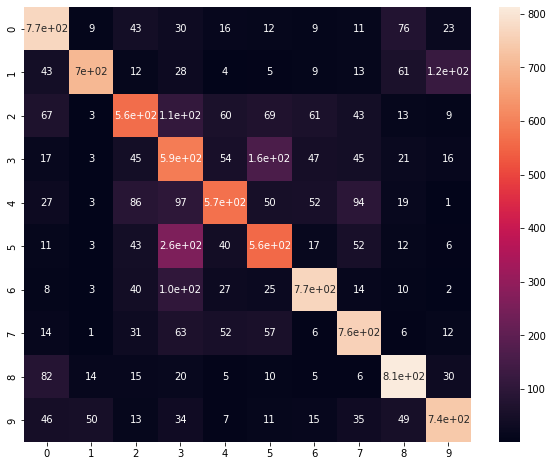

In [16]:
# evaluation of the model by cofusion matrix:
plt.figure(figsize=(10,8))
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True)

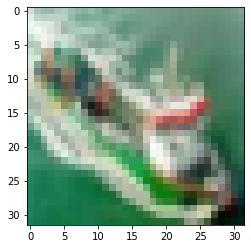

In [35]:
# testing on arbitrary image:
test_image_01 = x_test[15]
plt.imshow(X=test_image_01)
plt.show()

In [36]:
# define a functoin for producing final labels: i.e. airplane, automobile, bird, ...
def final_label(prediction):
    dict_of_labels = {0:"airplane",
                      1:"automobile",
                      2:"bird",
                      3:"cat",
                      4:"dog",
                      5:"deer",
                      6:"frog",
                      7:"horse",
                      8:"ship",
                      9:"truck"}
    
    if prediction in dict_of_labels:
        return dict_of_labels[prediction]   

In [37]:
# testing our model with above image:
prediction_01 =np.argmax(cnn_model.predict(test_image_01.reshape(1,32, 32, 3)))
print("the picture is an/a ", final_label(prediction_01))

the picture is an/a  ship


# The End